In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [16]:
import datetime

In [2]:
data = pd.read_csv("covid_19_india.csv")

In [3]:
data

Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
16845  16846  2021-07-07  8:00 AM            Telangana   
16846  16847  2021-07-07  8:00 AM              Tripura   
16847  16848  2021-07-07  8:00 AM          Uttarakhand   
16848  16849  2021-07-07  8:00 AM        Uttar Pradesh   
16849  16850  2021-07-07  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2                        0        0       0   
3                           3                        0        0       0   
4                           3                        0        0       0   
...                       ...                      ...      ...     ...   
16845                       -                        -   613124    3703   
16846                       -                        -    63964     701   
16847                       -                        -   332006    7338   
16848                       -                        -  1682130   22656   
16849                       -                        -  1472132   17834   

       Confirmed  
0              1  
1              1  
2              2  
3              3  
4              3  
...          ...  
16845     628282  
16846      68612  
16847     340882  
16848    1706818  
16849    1507241  

[16850 rows x 9 columns]

In [4]:
total_confirmed = data.Confirmed.sum()
total_confirmed

4353478074

In [5]:
total_cured = data.Cured.sum()
total_cured

3977194136

In [6]:
total_deaths = data.Deaths.sum()
total_deaths

58726000

In [7]:
data.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
data.replace('Bihar****','Bihar',inplace=True)

### total state confirmed cured deaths¶

In [9]:
all_states_confirmed = data.groupby('State/UnionTerritory').Confirmed.sum()    
all_states_confirmed

State/UnionTerritory
Andaman and Nicobar Islands                   1675248
Andhra Pradesh                              324146783
Arunachal Pradesh                             5598324
Assam                                        80418492
Bihar                                       108312449
Cases being reassigned to states               345565
Chandigarh                                    8691806
Chhattisgarh                                128751782
Dadra and Nagar Haveli                          20722
Dadra and Nagar Haveli and Daman and Diu      1566846
Daman & Diu                                         2
Delhi                                       236972842
Goa                                          22280065
Gujarat                                     114557615
Haryana                                     107408371
Himachal Pradesh                             23052151
Jammu and Kashmir                            46899925
Jharkhand                                    49971564
Karnata

In [10]:
all_states_cured = data.groupby('State/UnionTerritory').Cured.sum()    
all_states_cured

State/UnionTerritory
Andaman and Nicobar Islands                   1589935
Andhra Pradesh                              303427899
Arunachal Pradesh                             5150519
Assam                                        74011348
Bihar                                       101533848
Cases being reassigned to states                    0
Chandigarh                                    7980284
Chhattisgarh                                117163544
Dadra and Nagar Haveli                          20352
Dadra and Nagar Haveli and Daman and Diu      1470986
Daman & Diu                                         0
Delhi                                       224062704
Goa                                          20224042
Gujarat                                     103995131
Haryana                                     100010131
Himachal Pradesh                             20682770
Jammu and Kashmir                            42295048
Jharkhand                                    46083978
Karnata

In [11]:
all_states_deaths = data.groupby('State/UnionTerritory').Deaths.sum()    
all_states_deaths

State/UnionTerritory
Andaman and Nicobar Islands                    22624
Andhra Pradesh                               2475816
Arunachal Pradesh                              19303
Assam                                         459575
Bihar                                         775163
Cases being reassigned to states                   0
Chandigarh                                    119356
Chhattisgarh                                 1591126
Dadra and Nagar Haveli                             8
Dadra and Nagar Haveli and Daman and Diu         874
Daman & Diu                                        0
Delhi                                        4066907
Goa                                           338359
Gujarat                                      1866811
Haryana                                      1166573
Himachal Pradesh                              371931
Jammu and Kashmir                             686680
Jharkhand                                     569298
Karnataka                

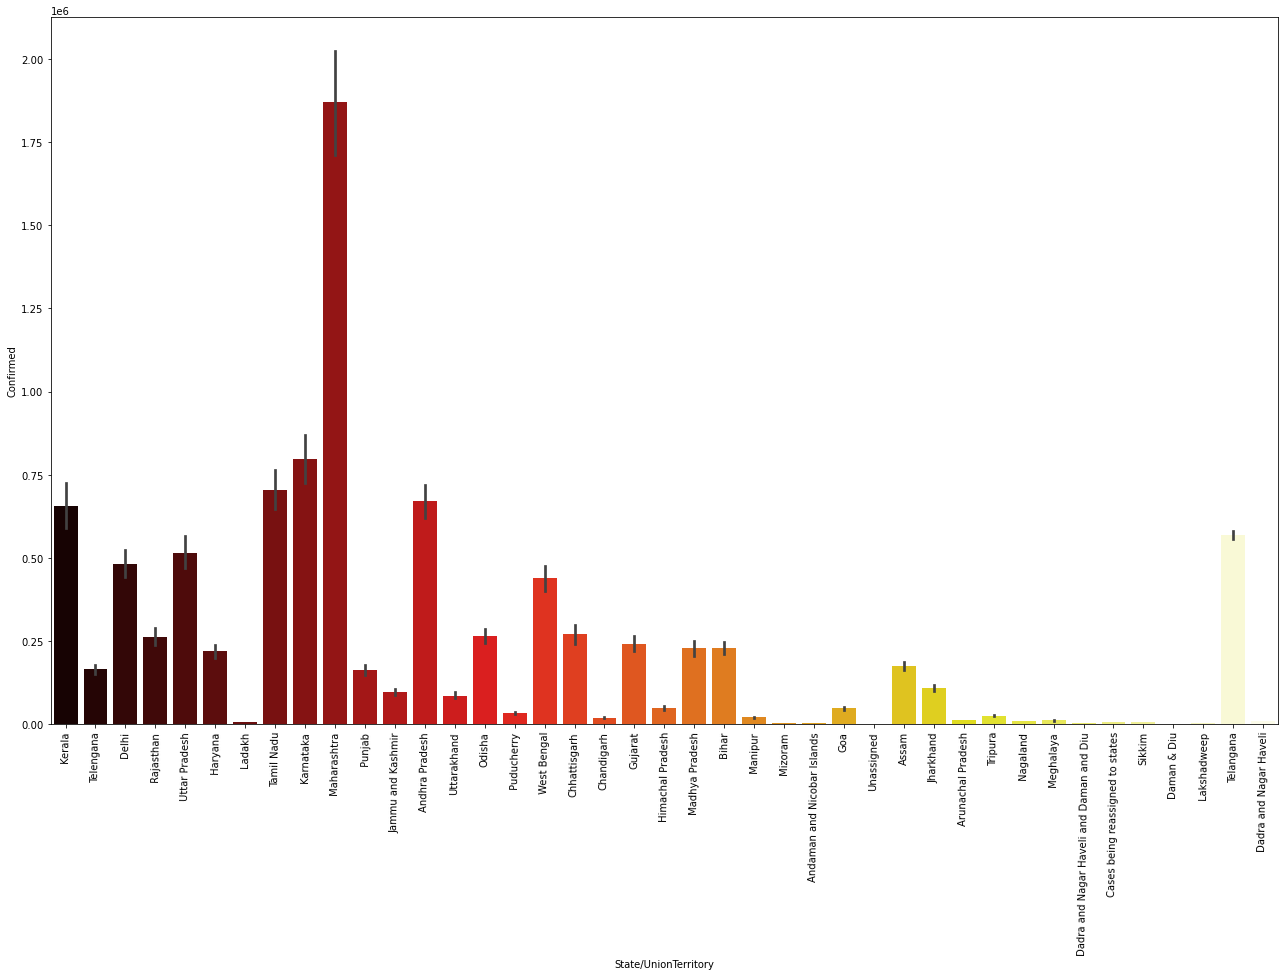

In [12]:
fig=plt.figure(figsize=(22,13))
sns.barplot(x='State/UnionTerritory',y='Confirmed',data=data,palette='hot')
plt.xticks(rotation=89)
plt.show()

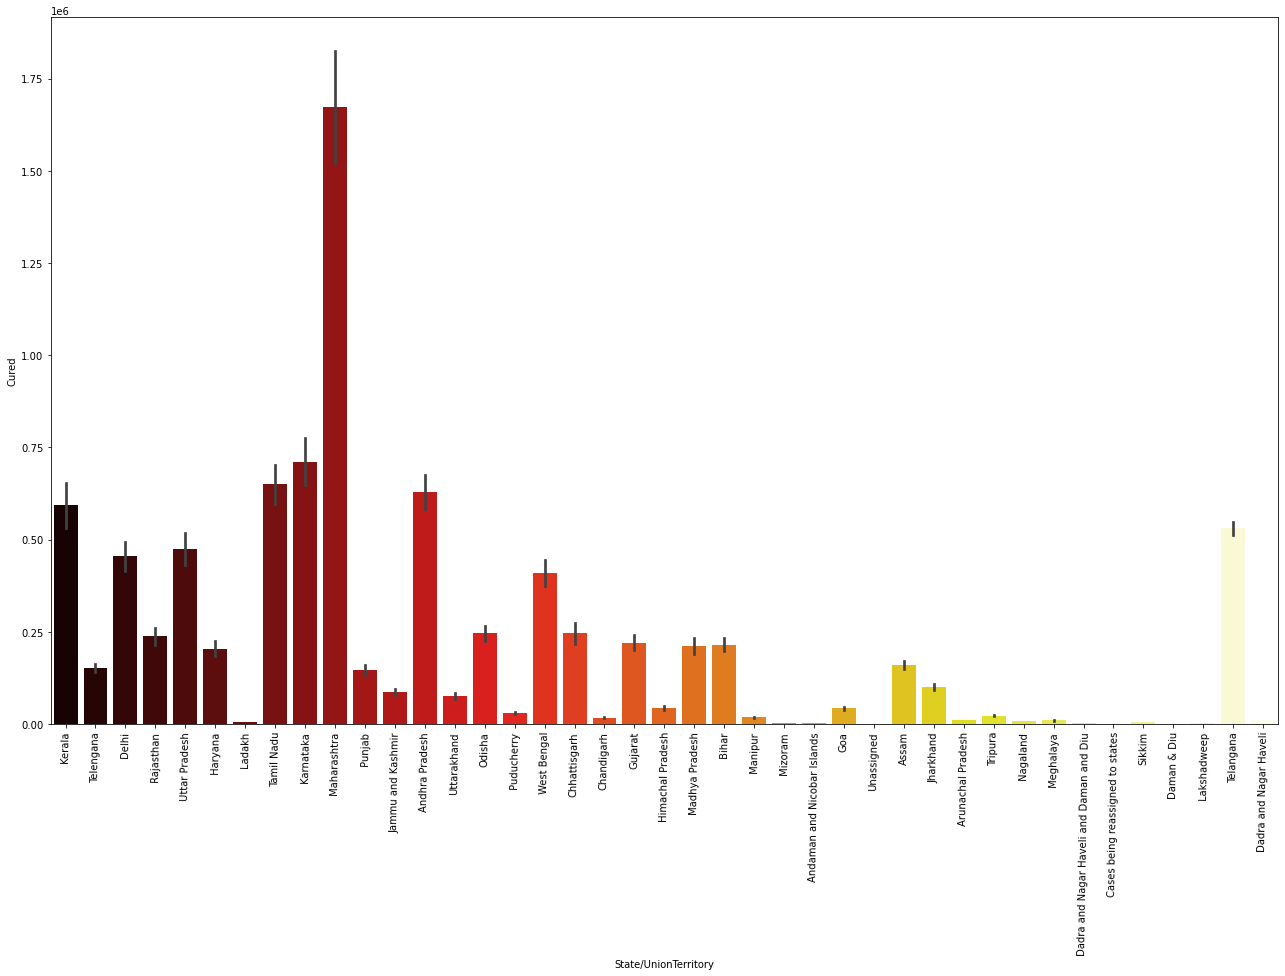

In [13]:
fig=plt.figure(figsize=(22,13))
sns.barplot(x='State/UnionTerritory',y='Cured',data=data,palette='hot')
plt.xticks(rotation=89)
plt.show()

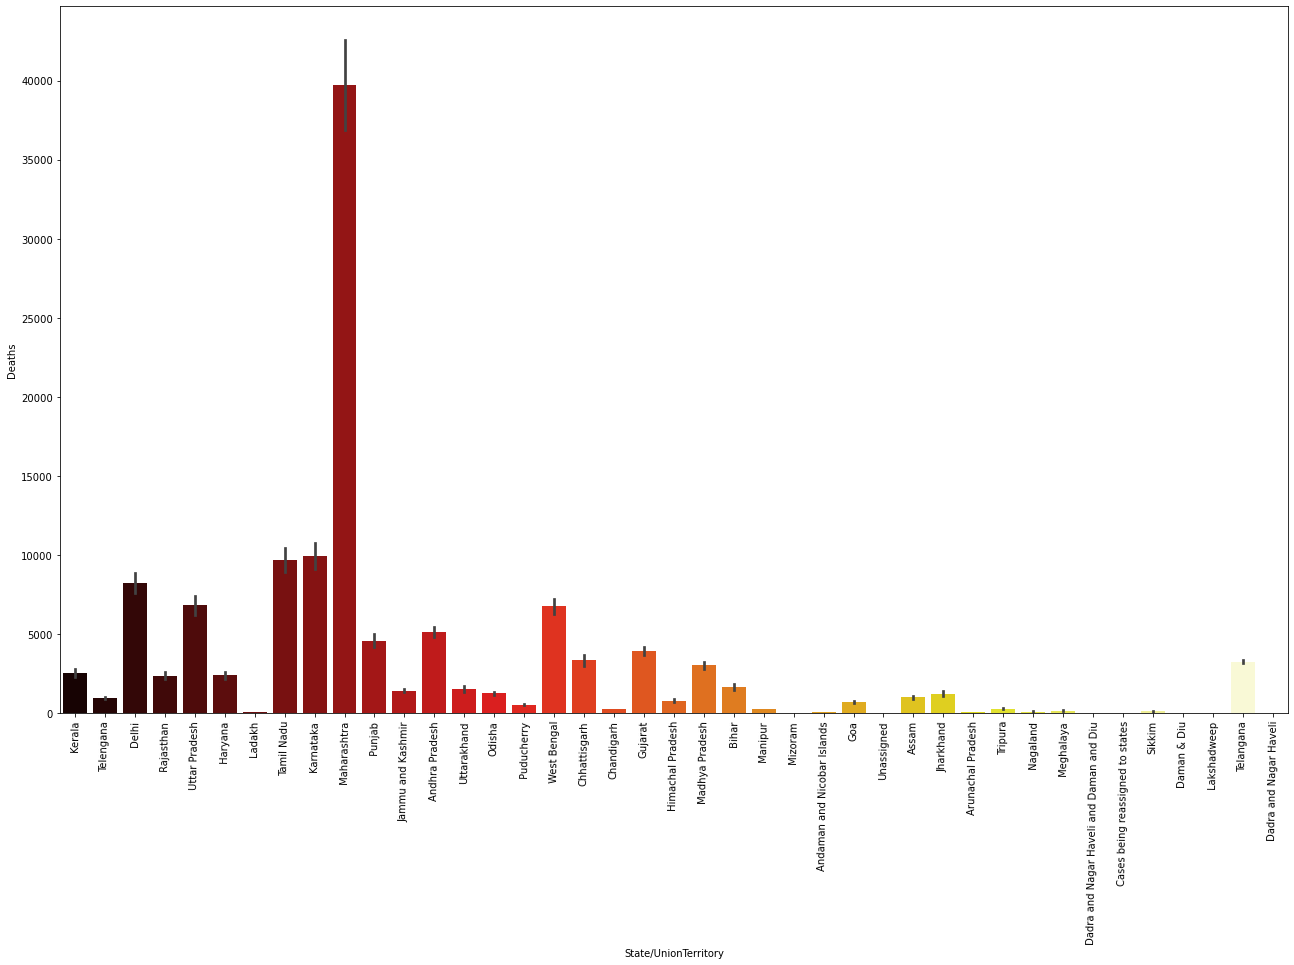

In [14]:
fig=plt.figure(figsize=(22,13))
sns.barplot(x='State/UnionTerritory',y='Deaths',data=data,palette='hot')
plt.xticks(rotation=89)
plt.show()

### date wise

In [18]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [19]:
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [20]:
year_data = data.groupby(['Year'])['Confirmed','Cured','Deaths'].max()
year_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_15308\2153341043.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_data = data.groupby(['Year'])['Confirmed','Cured','Deaths'].max()


Confirmed    Cured  Deaths
Year                            
2020    1928603  1824934   49463
2021    6113335  5872268  123531

In [21]:
month_data = data.groupby(['Month'])['Confirmed','Cured','Deaths'].max()
month_data

C:\Users\Admin\AppData\Local\Temp\ipykernel_15308\383504630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  month_data = data.groupby(['Month'])['Confirmed','Cured','Deaths'].max()


Confirmed    Cured  Deaths
Month                            
1        2023814  1927335   51042
2        2146777  2020951   52092
3        2773436  2377127   54422
4        4539553  3799266   67985
5        5731815  5362370   94844
6        6051633  5809548  121804
7        6113335  5872268  123531
8         780689   562401   24399
9        1366129  1069159   36181
10       1672858  1503050   43837
11       1820059  1680926   47071
12       1928603  1824934   49463

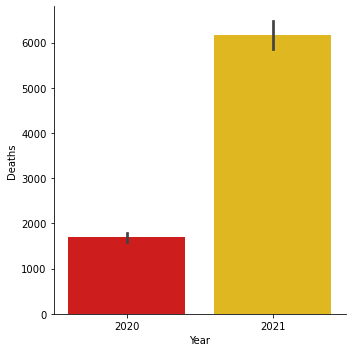

In [30]:
sns.catplot(data=data,x='Year',y='Deaths',kind='bar',palette='hot')

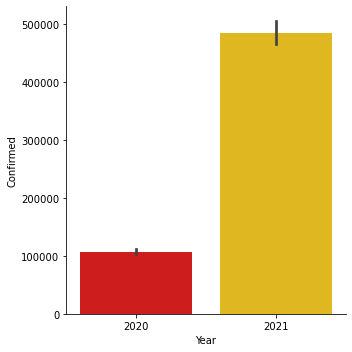

In [31]:
sns.catplot(data=data,x='Year',y='Confirmed',kind='bar',palette='hot')

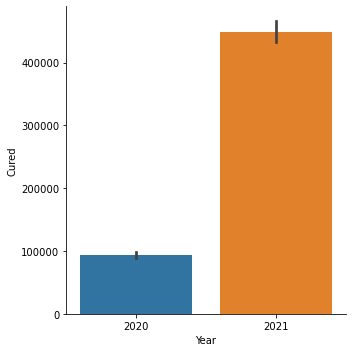

In [29]:
sns.catplot(data=data,x='Year',y='Cured',kind='bar')

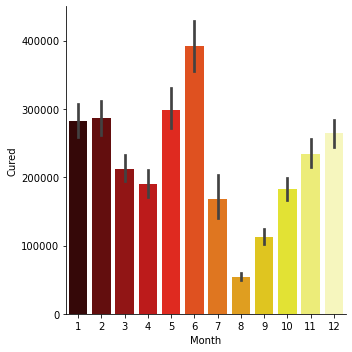

In [33]:
sns.catplot(data=data,x='Month',y='Cured',kind='bar',palette='hot')

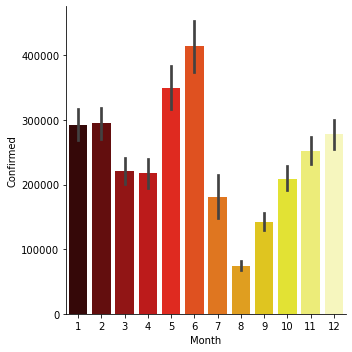

In [34]:
sns.catplot(data=data,x='Month',y='Confirmed',kind='bar',palette='hot')

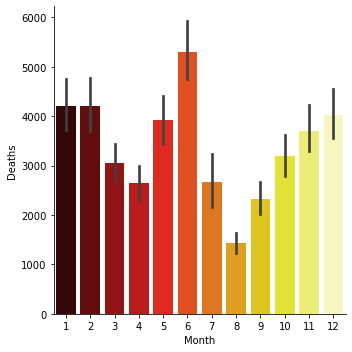

In [35]:
sns.catplot(data=data,x='Month',y='Deaths',kind='bar',palette='hot')

### mortality rate

In [36]:
data['mortality_rate']=data['Deaths']/(data['Confirmed']*100)

In [37]:
data

Sno       Date     Time State/UnionTerritory ConfirmedIndianNational  \
0          1 2020-01-30  6:00 PM               Kerala                       1   
1          2 2020-01-31  6:00 PM               Kerala                       1   
2          3 2020-02-01  6:00 PM               Kerala                       2   
3          4 2020-02-02  6:00 PM               Kerala                       3   
4          5 2020-02-03  6:00 PM               Kerala                       3   
...      ...        ...      ...                  ...                     ...   
16845  16846 2021-07-07  8:00 AM            Telangana                       -   
16846  16847 2021-07-07  8:00 AM              Tripura                       -   
16847  16848 2021-07-07  8:00 AM          Uttarakhand                       -   
16848  16849 2021-07-07  8:00 AM        Uttar Pradesh                       -   
16849  16850 2021-07-07  8:00 AM          West Bengal                       -   

      ConfirmedForeignNational    Cured  Deaths  Confirmed  Day  Month  Year  \
0                            0        0       0          1   30      1  2020   
1                            0        0       0          1   31      1  2020   
2                            0        0       0          2    1      2  2020   
3                            0        0       0          3    2      2  2020   
4                            0        0       0          3    3      2  2020   
...                        ...      ...     ...        ...  ...    ...   ...   
16845                        -   613124    3703     628282    7      7  2021   
16846                        -    63964     701      68612    7      7  2021   
16847                        -   332006    7338     340882    7      7  2021   
16848                        -  1682130   22656    1706818    7      7  2021   
16849                        -  1472132   17834    1507241    7      7  2021   

       mortality_rate  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4            0.000000  
...               ...  
16845        0.000059  
16846        0.000102  
16847        0.000215  
16848        0.000133  
16849        0.000118  

[16850 rows x 13 columns]

### using plotly

In [38]:
import plotly.express as px

In [39]:
from plotly.offline import iplot

In [40]:
arr=data

In [41]:
arr

Sno       Date     Time State/UnionTerritory ConfirmedIndianNational  \
0          1 2020-01-30  6:00 PM               Kerala                       1   
1          2 2020-01-31  6:00 PM               Kerala                       1   
2          3 2020-02-01  6:00 PM               Kerala                       2   
3          4 2020-02-02  6:00 PM               Kerala                       3   
4          5 2020-02-03  6:00 PM               Kerala                       3   
...      ...        ...      ...                  ...                     ...   
16845  16846 2021-07-07  8:00 AM            Telangana                       -   
16846  16847 2021-07-07  8:00 AM              Tripura                       -   
16847  16848 2021-07-07  8:00 AM          Uttarakhand                       -   
16848  16849 2021-07-07  8:00 AM        Uttar Pradesh                       -   
16849  16850 2021-07-07  8:00 AM          West Bengal                       -   

      ConfirmedForeignNational    Cured  Deaths  Confirmed  Day  Month  Year  \
0                            0        0       0          1   30      1  2020   
1                            0        0       0          1   31      1  2020   
2                            0        0       0          2    1      2  2020   
3                            0        0       0          3    2      2  2020   
4                            0        0       0          3    3      2  2020   
...                        ...      ...     ...        ...  ...    ...   ...   
16845                        -   613124    3703     628282    7      7  2021   
16846                        -    63964     701      68612    7      7  2021   
16847                        -   332006    7338     340882    7      7  2021   
16848                        -  1682130   22656    1706818    7      7  2021   
16849                        -  1472132   17834    1507241    7      7  2021   

       mortality_rate  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4            0.000000  
...               ...  
16845        0.000059  
16846        0.000102  
16847        0.000215  
16848        0.000133  
16849        0.000118  

[16850 rows x 13 columns]

In [47]:
px.line(arr,x='Date',y='Confirmed')

In [50]:
px.line(arr,x='State/UnionTerritory',y=['Confirmed','Cured','Deaths'])